In [2]:
import tensorflow as tf

import sys

print(sys.version)
print(tf.__version__)



3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
2.10.0


In [2]:
# 실행가능한 gpu 목록
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#실행가능한 cpu, gpu 목록
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3478815778734143819
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1382701056
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15645935538918192290
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [3]:
# 상수 선언

hello = tf.constant('Hello World')

print(hello)

print(hello.numpy()) #바이트 배열

print(hello.numpy().decode('utf-8')) # 바이트 배열을 스트링으로 변환

a = tf.constant(10)

b = tf.constant(32)

c = tf.add(a, b)  

#c = a+b

print(c.numpy())

print([a.numpy(),b.numpy(),c.numpy()])

# utf-8 3bite
# euc-kr 2bite
# 한국어는 utf-8(3bite)

#tf.Tensor(b'Hello', shape=(), dtype=string)

tf.Tensor(b'Hello World', shape=(), dtype=string)
b'Hello World'
Hello World
42
[10, 32, 42]


In [4]:
node1=tf.constant(3.0)

node2=tf.constant(4.0)

node3=tf.add(node1,node2)

print(node3.numpy())

7.0


In [5]:
def output(a,b):
        return tf.multiply(a, b)

print(output(3.0, 5.0).numpy())

print(output(0.0, 6.0).numpy())

print(output([2.0,3.1,7.4], [6.0,2.5,3.1]).numpy())

15.0
0.0
[12.    7.75 22.94]


In [6]:
#텐서플로의 변수 선언

W = tf.Variable([0.3], dtype=tf.float32)

b = tf.Variable([-0.3], dtype=tf.float32)

def linear_model(x):

    return tf.multiply(W,tf.add(x,b))

x=[1.,2.,3.,4.]

# x의 값에 따라 linear_model 계산

linear_model(x).numpy()

array([0.21000001, 0.51000005, 0.81000006, 1.11      ], dtype=float32)

In [7]:
import numpy as np

X = np.array([[1,2,3],[4,5,6]])

print(X.shape)

print('X\n',X)



W = np.array([[np.random.randint(10) for col in range(2)] for row in range(3)])

print(W.shape)

print('W\n',W)

b = np.array([[np.random.randint(10) for col in range(1)] for row in range(2)])

print(b.shape)

print('b\n',b)

(2, 3)
X
 [[1 2 3]
 [4 5 6]]
(3, 2)
W
 [[2 8]
 [7 1]
 [8 0]]
(2, 1)
b
 [[1]
 [4]]


In [8]:
def expr(X):

    return tf.matmul(X, W) +b #행렬 곱셈

expr(X).numpy()



array([[41, 11],
       [95, 41]])

### 회귀분석

In [2]:
import numpy as np

np.random.seed(7)

#데이터 로딩, 시작36행은 건너뜀

data=np.genfromtxt("./DATA/x09.txt",skip_header=36)

data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

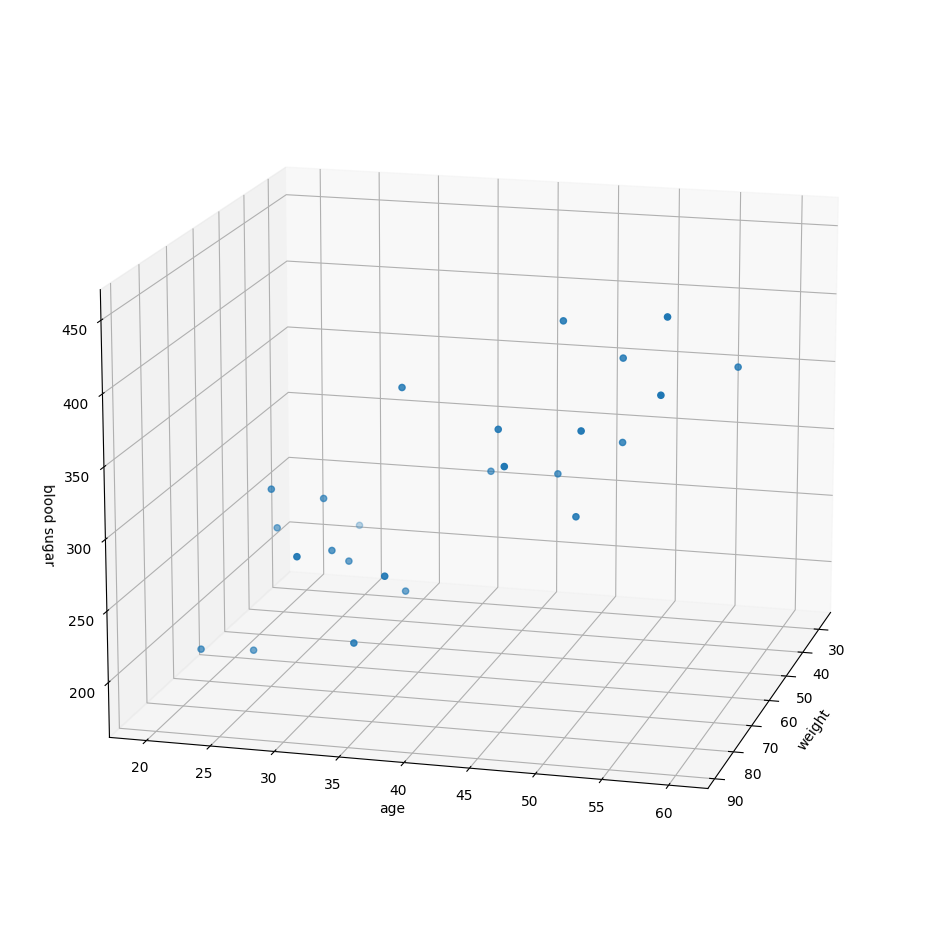

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# set x,y,z
xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)

# plot x,y,x
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15) #출력 각도 설정
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

#데이터를 케라스에 맞게 변환

#독립변수
x_data=np.array(data[:,2:4],dtype=np.float32)

#종속변수
y_data=np.array(data[:,4],dtype=np.float32)

In [5]:
#회귀분석 모델 생성

model=Sequential()
model.add(Dense(1,input_shape=(2,)))

#손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)
#최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수
#손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표
#손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정
#평균제곱오차(Meam Squared Error, MSE), 회귀분석에서 많이 사용하는 손실함수

# https://keras.io/ko/optimizers/  옵티마이저 참조

rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01

model.compile(loss='mse',optimizer=rmsprop)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# !pip install graphviz
# !pip install pydot
# !pip install pydotplus

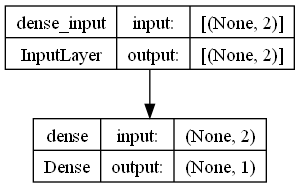

In [6]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [7]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 766ms/step - loss: 86707.3984
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 84697.0938
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 83262.2266
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 82074.7188
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 81030.7109
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 80082.1250
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 79202.2109
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 78374.3438
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 77587.3906
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 76833.5078
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 76106.9531
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 75403.3516

In [8]:
hist.history.keys()

dict_keys(['loss'])

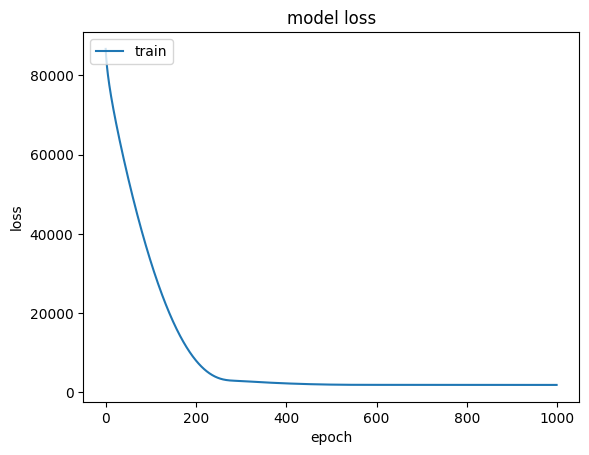

In [9]:
plt.plot(hist.history["loss"])

plt.title("model loss")

plt.ylabel("loss")

plt.xlabel("epoch")

plt.legend(["train"],loc="upper left")

plt.show()

In [10]:
#새로운 데이터로 예측

#체중 100kg, 40세

#1차원 배열을 1행 2열의 2차원 배열로 변환

model.predict(np.array([100,40]).reshape(1,2))

1/1 [==============================] - 0s 59ms/step


array([[350.51846]], dtype=float32)

In [11]:
#체중 60kg, 25세

model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 20ms/step


array([[219.60388]], dtype=float32)

In [12]:
#회귀선을 그리기 위한 작업

#가중치와 절편,편향(bias)

w, b =model.get_weights()

w, b

(array([[1.1940424],
        [5.543525 ]], dtype=float32),
 array([9.373199], dtype=float32))

In [13]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

x=np.linspace(20,100,50).reshape(50,1)

y=np.linspace(10,70,50).reshape(50,1)

x2=np.concatenate((x,y),axis=1) #x,y연결

#행렬곱셈

z=np.matmul(x2,w)+b

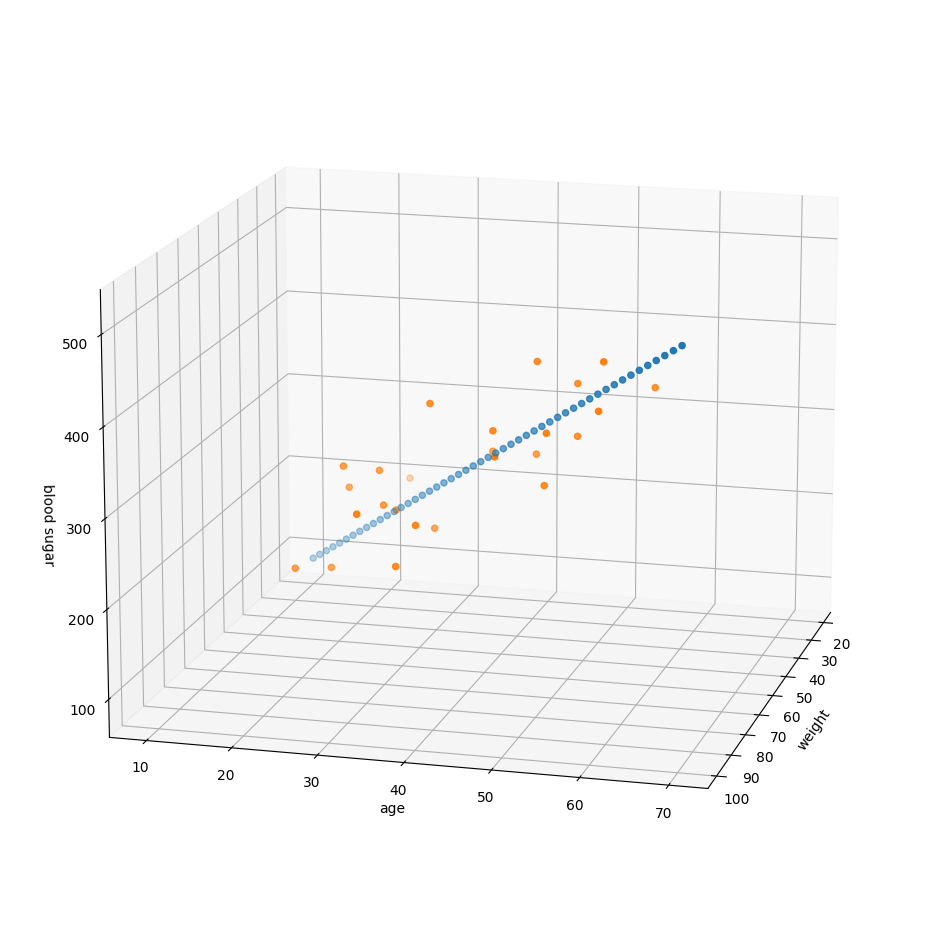

In [14]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(111,projection='3d')

#회귀선

ax.scatter(x,y,z)

#산점도

ax.scatter(xdata,ydata,zdata)

ax.set_xlabel("weight")

ax.set_ylabel("age")

ax.set_zlabel("blood sugar")

ax.view_init(15,15)

plt.show()